## RandomForestsRegressor
<p> Same as before no feature engineering and EDA in this model_3 we shall be using random forests and ignore the Polynomial features to see how well of our model can do without them.</p>

In [1]:
# Loading the dataset
import pandas as pd
data = pd.read_csv("/home/kenbaker-gif/ML-Projects/Boston/data/train.csv")
data_2 = pd.read_csv("/home/kenbaker-gif/ML-Projects/Boston/data/test.csv")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# X = data[["lstat", "rm", "ptratio", "crim"]] # Only four features
X = data.drop("medv", axis=1) # Uses all 13 features except the medv
y = data["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Creating the Random Forest Regresor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# With the code block below in multi-line string I used it to tune and look for the best values for best r2score and MSE.
"""                                   
r2_scores = []
n_trees = [10, 50, 100, 200, 500]

for n in n_trees:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

print(list(zip(n_trees, r2_scores)))

"""

rfr_model = RandomForestRegressor()
rfr_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [4]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = rfr_model.predict(X_test_scaled)
print(f"MSE:---> {mean_squared_error(y_test, y_pred)}")
print(f"r2Score:---> {r2_score(y_test, y_pred)}")

MSE:---> 8.712640402985066
r2Score:---> 0.9031911447704539


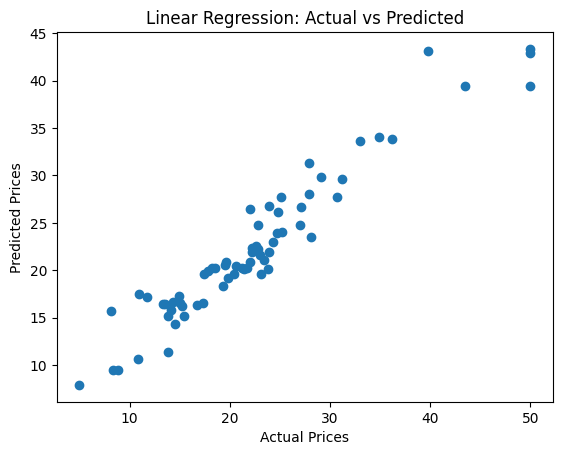

In [5]:
# Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()